# LAB 2: Genetic Algorithms. 
### Pygmo Optimization for Himmelblau, Rastrigin and Rosenbrock Functions
### AI and Machine Learning // Suchkova Natalia М8О-114М-22
30.10.2022 @ MAI IT-Center

### Постановка задачи
 
1.

2.

3.


## Table of Contents

1. [**Self-adaptive Differential Evolution (sade)**](#gen1)

    - [Himmelblau](#gen1) 
        + [Evolution Graph](#gen111)
        + [Contour plot](#gen112)
    - [Rastrigin](#gen12)
    - [Rosenbrock](#gen13)



2. [**Grey Wolf Optimizer (gwo)**](#gen2)

    - [Himmelblau](#ge2) 
        + Evolution Graph
        + Contour plot
    - [Rastrigin](#gen22)
    - [Rosenbrock](#gen23)



3. [**Extended Ant Colony Optimization algorithm (gaco)**](#gen3)

    - [Himmelblau](#gen3) 
        + Evolution Graph
        + Contour plot
    - [Rastrigin](#gen32)
    - [Rosenbrock](#gen33)


4. [**Own Defined Optimization Problem**](#gen4)


In [1]:
import pygmo as pg
from pygmo import *
from IPython.display import Image
from IPython.core.display import HTML
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

In [2]:
pg.__version__

'2.13.0'

In [49]:
# создавем вспомогательный датафрейм, для вывода всей истории результатов
df = pd.DataFrame(columns=['Problem', 'Method', 'Pop_Size',
                           'Num_Geners', 'Num_Evoluts', 
                           'Min_Coordinates', 'Function_Value'])

<a id='gen1'></a>

## Self-adaptive Differential Evolution (SADE)

### Himmelblau

**Функция Химмельблау**	$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $

Напомним, как должен выглядеть *оптимумальный\ые минимум\ы*:

In [50]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/3b6d888196974f862467cfe02748f3ae2ffdf476")

In [51]:
class HimmelblauOptimization: 
    """
    Задаем проблему Химмельблау, так как не нашла ее в pygmo почему-то :/
    This class defines a PyGMO-compatible User-Defined Optimization Problem.
    Конструктор  класса
    """

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float): 
        
        # задаем границы определения функции

        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x: list): # вычисляем значение функции
        
        function_value = (x[0] * x[0] + x[1] - 11.0) ** 2 + (x[0] + x[1] * x[1] - 7.0) ** 2
        return [function_value]

In [52]:
print(problem(HimmelblauOptimization(-5.12, 5.12, -5.12, 5.12)))

Problem name: <class '__main__.HimmelblauOptimization'>
	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5.12, -5.12]
	Upper bounds: [5.12, 5.12]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [53]:
problem_Him = problem(HimmelblauOptimization(-5.12, 5.12, -5.12, 5.12))

In [54]:
pop_size = 100  # зададим внешние переменные ака характеристики популяции,
current_seed = 23 # чтобы условия (зерно рандомизации) у всех адгоритмов были одинаковые
number_of_evolutions = 10 # количество повторений цикла эволюции

In [55]:
def few_evols(algo, pop, gens=10,
              number_of_evols=10):
    
    """
    algo (pygmo obj) - алгоритм для оптимизации
    pop (pygmo obj) - популяция
    number_of_evols (int) - количество раз эволюции
    """
    if algo is pg.gaco:
        cur_algo = algorithm(algo(10, 13, 1.0, 1e9,
                                  0.0, 1, 7, 100000, 
                                  100000, 0.0, False, 23))
    else:
        cur_algo = algorithm(algo(gen=gens)) # задаем параметры алгоритма
    cur_algo.set_verbosity(2)  # частота лагирования
    individuals_list = []
    fitness_list = []
    
    # Заставляем популяцию эволюционировать
    for i in range(number_of_evols):
        pop = cur_algo.evolve(pop)  # запускаем эволюцию  начальной популяции
        individuals_list.append(pop.get_x()[pop.best_idx()])
        fitness_list.append(pop.get_f()[pop.best_idx()])
    
    # можно высети лог (историю лагирования) каждые n итераций из set_verbosity()
    log = cur_algo.extract(algo).get_log()
    
    # колдуем над датафреймом
    method = str(pop)
    if 'class' in method:
        method = method[31:41]
    elif 'Rastrigin' in method:
        method = method[14:23]
    else:
        method = method[31:41]
    data = [method, str(algo)[8:-2], pop_size, gens, 
            number_of_evols, np.around(pop.champion_x, 5), np.around(pop.champion_f, 5)]
    df.loc[len(df)] = data
    
    return pop, individuals_list, fitness_list, log, df, number_of_evols

In [56]:
# можно еще посмотреть информацию об алгоритмах
algo1 = algorithm(sade(gen=10))
print(algo1)

Algorithm name: saDE: Self-adaptive Differential Evolution [stochastic]
	Thread safety: basic

Extra info:
	Generations: 10
	Variant: 2
	Self adaptation variant: 1
	Stopping xtol: 1e-06
	Stopping ftol: 1e-06
	Memory: false
	Verbosity: 0
	Seed: 3745457912


In [57]:
pop_him = population(problem_Him, size=pop_size, seed=current_seed)

pop_him = few_evols(sade, pop_him)

pop_him[1]  # individuals_list 
pop_him[2]  # fitness_list

[array([0.05139828]),
 array([0.00376453]),
 array([0.00376453]),
 array([0.00010709]),
 array([0.00010709]),
 array([0.00010709]),
 array([1.09816603e-05]),
 array([2.3593759e-06]),
 array([7.44542647e-07]),
 array([1.7143479e-08])]

In [58]:
def plot(problem, result, num_evols):
    
    (x_min, y_min), (x_max, y_max) = problem.get_bounds()

    # Изобразим минимизацию за все поколения
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(np.arange(0, num_evols), result[2], color='darkgreen', label='Значение функции')

    # Выведем лучший образец
    champion_n = np.argmin(np.array(result[2]))
    ax.scatter(champion_n, np.min(result[2]), marker='x', color='r', label='Абсолютный чемпион')

    ax.set_xlim((0, num_evols))
    ax.grid('major')
    ax.set_title('Динамика значения лучшего индивида в поколении', fontweight='bold')
    ax.set_xlabel('Номер поколения')
    ax.set_ylabel('Значение минимизируемой функции')
    ax.legend(loc='upper right')
    plt.tight_layout()

    # Показ
    plt.show()

<a id='gen111'></a>

<a id='gen111'></a>

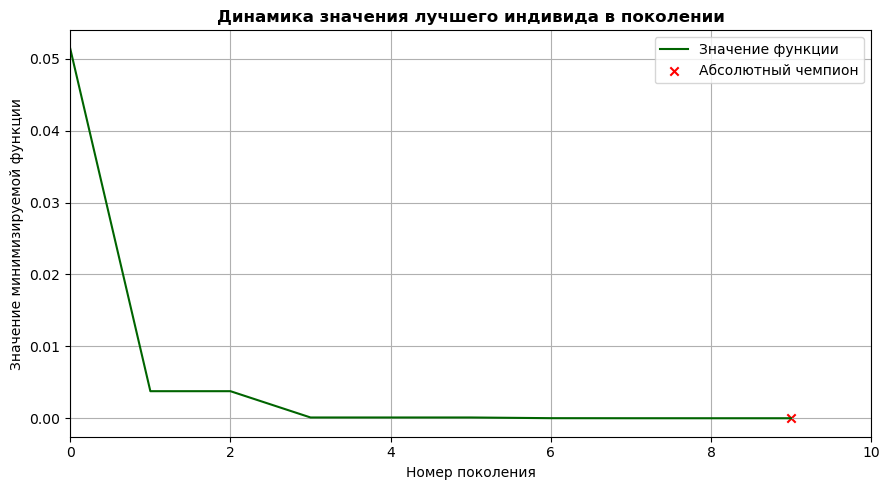

In [59]:
plot(problem_Him, pop_him, number_of_evolutions)

In [60]:
def plot_surf(prob, results):
    best_x = [ind[0] for ind in results[1]]
    best_y = [ind[1] for ind in results[1]]
    grid_points = 100
    (x_min, y_min), (x_max, y_max) = prob.get_bounds()
    x_vector = np.linspace(x_min, x_max, grid_points)
    y_vector = np.linspace(y_min, y_max, grid_points)
    x_grid, y_grid = np.meshgrid(x_vector, y_vector)
    z_grid = np.zeros((grid_points, grid_points))
    
    for i in range(x_grid.shape[1]):
        for j in range(x_grid.shape[0]):
            z_grid[i, j] = prob.fitness([x_grid[i, j], y_grid[i, j]])[0]

    fig, ax = plt.subplots(figsize=(9,5))
    cs = ax.contour(x_grid, y_grid, z_grid, 50, zorder=0)
    
    ax.scatter(best_x, best_y, marker='x', color='r', zorder=1)

    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.set_title('Поверхность функции', fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel('Значение функции $f$')
#     plt.tight_layout()

    plt.show()

<a id='gen112'></a>

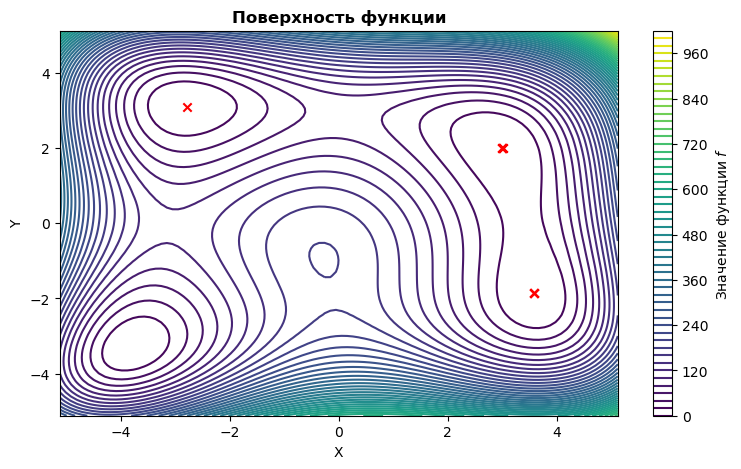

In [61]:
plot_surf(problem_Him, pop_him) # нарисуем contour plot

In [62]:
print('Found Minimum Coordinates:', np.around(pop_him[0].champion_x, 5))

Found Minimum Coordinates: [2.99998 2.00001]


In [63]:
print('Function Value =', float(np.around(pop_him[0].champion_f, 10)))

Function Value = 1.71e-08


In [64]:
pop_him[3] # выводим лог

[(1,
  100,
  7.44542647293326e-07,
  0.967192921371179,
  0.24919409869185433,
  0.007264581330148623,
  0.0013533360072192024),
 (3,
  300,
  4.245605934491365e-07,
  0.11428824386019544,
  0.8053435769928997,
  6.940088033177353,
  0.00041596368960766875),
 (5,
  500,
  4.715244481893712e-08,
  0.35114707805570844,
  0.7853394988519539,
  6.940239582859281,
  0.0004163410977562989),
 (7,
  700,
  1.7143479033998692e-08,
  0.15048106813619372,
  0.9268826062994528,
  6.940289411772508,
  0.0004163711067220839),
 (9,
  900,
  1.7143479033998692e-08,
  0.15048106813619372,
  0.9268826062994528,
  6.9407160612546495,
  0.0003350463881617422)]

### Rastrigin
<a id='gen12'></a>

**Функция Растригина** $f(x) = An + \displaystyle\sum_{i=1}^{n} \big\lbrack  x_i^2 - Acos(2pix_i) \big\rbrack$, where $A = 10$

In [65]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/0ef36b9a7230888e739f302e1a5d67e36c152de8")

In [66]:
# classics
sade_algo = algorithm(sade(gen=10))
problem_Rast = problem(rastrigin(dim=2)) 
pop = population(problem_Rast, size=pop_size, seed=current_seed)
pop = sade_algo.evolve(pop)
pop.champion_x

array([-0.00409733,  0.03577151])

In [67]:
problem_Rast = problem(rastrigin(dim=2))  # задаем параметры оптимизируемой функции "проблемы" Растиригина

In [68]:
print(problem_Rast)

Problem name: Rastrigin Function
	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5.12, -5.12]
	Upper bounds: [5.12, 5.12]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: true
	User implemented hessians sparsity: true
	Expected hessian components: [2]

	Fitness evaluations: 0
	Gradient evaluations: 0
	Hessians evaluations: 0

	Thread safety: basic



In [69]:
pop_rast = population(problem_Rast, size=pop_size, seed=current_seed)  # задаем параметры начальной популяции

pop_rast = few_evols(sade, pop_rast, 10, 4)

In [70]:
print('Found Minimum Coordinates:', np.around(pop_rast[0].champion_x, 5)) # лучший результат - индивид

Found Minimum Coordinates: [0.00302 0.00275]


In [71]:
print('Function Value =', float(np.around(pop_rast[0].champion_f, 5))) # лучший результат - значение функции

Function Value = 0.00331


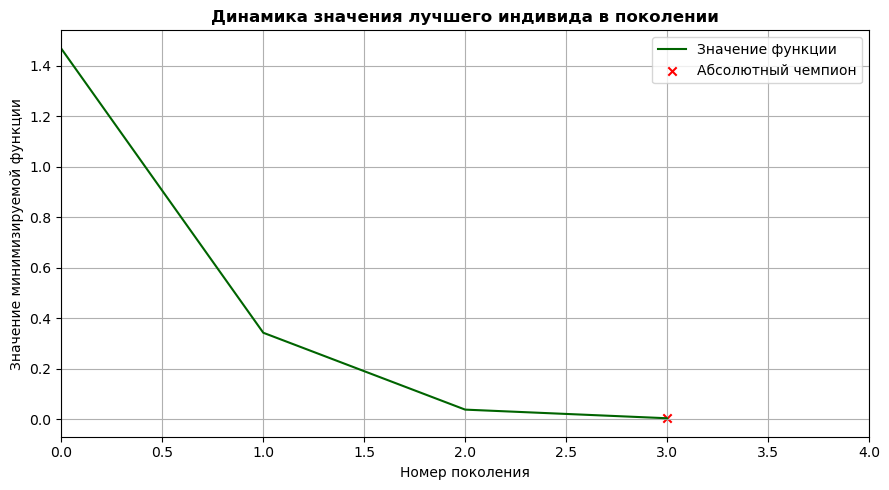

In [72]:
plot(problem_Rast, pop_rast, pop_rast[5])

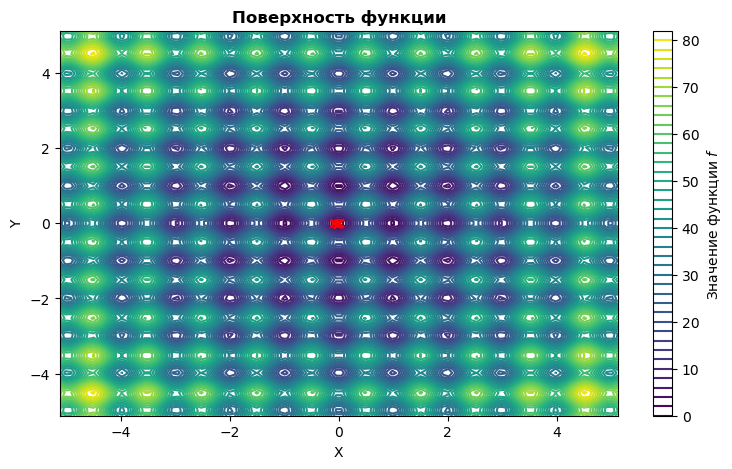

In [73]:
plot_surf(problem_Rast, pop_rast)

In [74]:
pop_rast[3]

[(1,
  100,
  0.03747708870528754,
  0.6358976897388049,
  0.7166536683567505,
  0.23152721153017816,
  7.826365461900899),
 (3,
  300,
  0.03747708870528754,
  0.6358976897388049,
  0.7166536683567505,
  1.9940732460503263,
  6.0259266063890315),
 (5,
  500,
  0.0061153229861616865,
  0.6829814752209723,
  0.9840615099357694,
  2.0932484108634277,
  3.4579813517642677),
 (7,
  700,
  0.003925861743496739,
  0.30994251927912086,
  0.4479055868289928,
  0.16071704015406826,
  3.387147364918267),
 (9,
  900,
  0.003925861743496739,
  0.30994251927912086,
  0.4479055868289928,
  0.15492622803074452,
  2.8689208733841163)]

In [75]:
pop_rast[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
0,Himmelblau,pygmo.core.sade,100,10,10,"[2.99998, 2.00001]",[0.0]
1,Rastrigin,pygmo.core.sade,100,10,4,"[0.00302, 0.00275]",[0.00331]


### Rosenbrock
<a id='gen13'></a>

**Функция Розенброка**	$f(x) = \displaystyle\sum_{i=1}^{n-1} \big\lbrack 100(x_{i+1} - x_i^2)^2 +(x_i - 1)^2 \big\rbrack$

In [76]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/53f008f82897059e3591d0a9a0aa27b60a1745b4")

In [77]:
problem_Rosen = problem(rosenbrock(dim=2)) # задаем проблему Розенброка

In [78]:
pop_rosen = population(problem_Rosen, size=pop_size, seed=current_seed)
pop_rosen = few_evols(sade, pop_rosen)

In [79]:
pop_rosen[0]

Problem name: Multidimensional Rosenbrock Function
	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10100
	Gradient evaluations: 0

	Thread safety: constant

Population size: 100

List of individuals: 
#0:
	ID:			1251045422705684049
	Decision vector:	[1, 1.00001]
	Fitness vector:		[1.31029e-09]
#1:
	ID:			13306745122587129611
	Decision vector:	[0.999818, 0.999664]
	Fitness vector:		[1.14652e-07]
#2:
	ID:			2243283290487074856
	Decision vector:	[0.999834, 0.999668]
	Fitness vector:		[2.75391e-08]
#3:
	ID:			14933863474924020957
	Decision vector:	[0.999194, 0.998414]
	Fitness vector:		[7.15757e-07]
#4:
	ID:			1724

In [80]:
print('Found Minimum Coordinates:', np.around(pop_rosen[0].champion_x, 5))

Found Minimum Coordinates: [1.00001 1.00003]


In [81]:
print('Found Minimum Coordinates:', np.around(pop_rosen[0].champion_f, 5))
pop_rosen[0].champion_f

Found Minimum Coordinates: [0.]


array([1.65805949e-10])

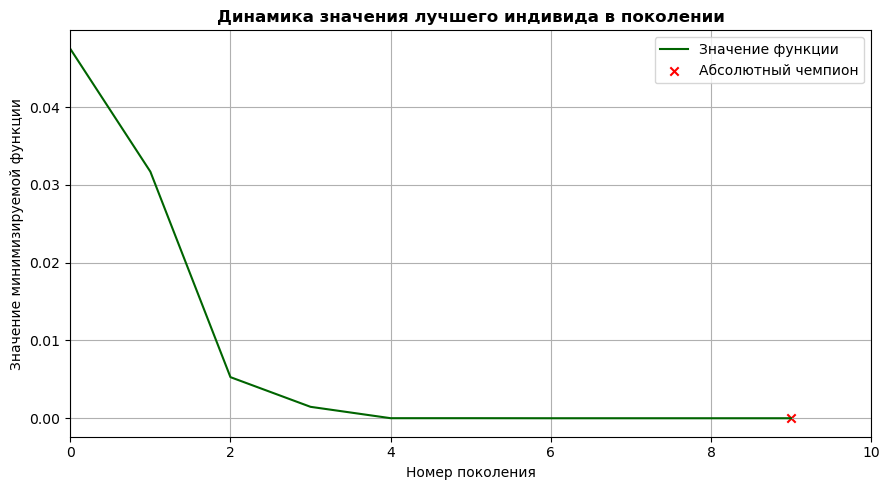

In [82]:
plot(problem_Rosen, pop_rosen, pop_rosen[5])

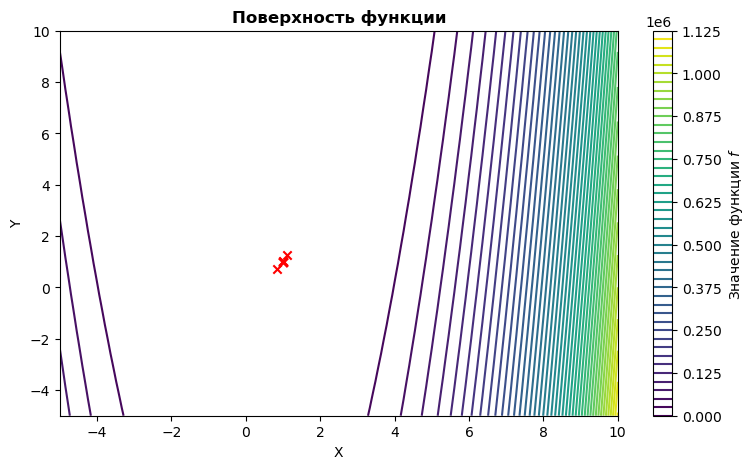

In [83]:
plot_surf(problem_Rosen, pop_rosen)

In [84]:
pop_rosen[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
0,Himmelblau,pygmo.core.sade,100,10,10,"[2.99998, 2.00001]",[0.0]
1,Rastrigin,pygmo.core.sade,100,10,4,"[0.00302, 0.00275]",[0.00331]
2,Rosenbrock,pygmo.core.sade,100,10,10,"[1.00001, 1.00003]",[0.0]


<a id='gen2'></a>

## Grey Wolf Optimizer (gwo)

### Himmelblau

In [85]:
pop_him = population(problem_Him, size=pop_size, seed=current_seed)  # задаем параметры начальной популяции

pop_him = few_evols(gwo, pop_him, 10, 4)

In [86]:
print('Found Minimum Coordinates:', np.around(pop_him[0].champion_x, 5)) 

Found Minimum Coordinates: [ 3.58305 -1.84691]


In [87]:
print('Found Minimum Coordinates:', np.around(pop_him[0].champion_f, 5))

Found Minimum Coordinates: [0.00011]


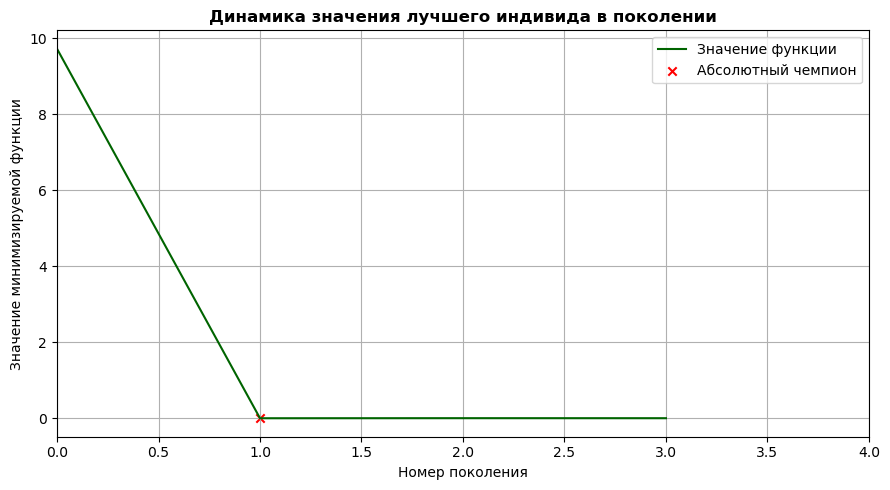

In [88]:
plot(problem_Him, pop_him, pop_him[5])

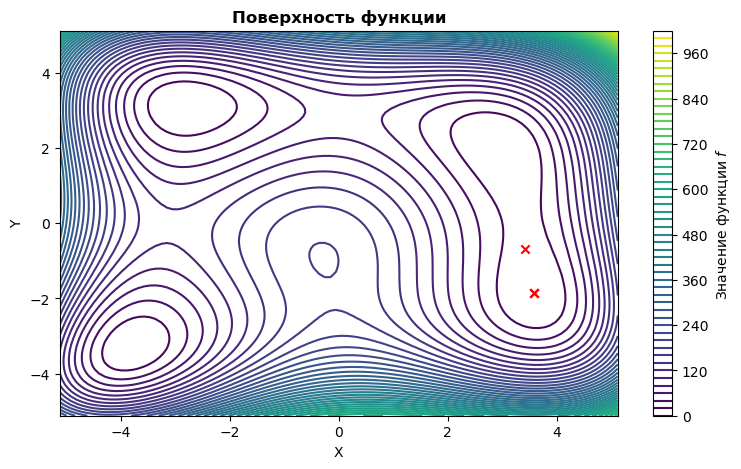

In [89]:
plot_surf(problem_Him, pop_him)

### Rastrigin

In [90]:
pop_rast = population(problem_Rast, size=pop_size, seed=current_seed)

pop_rast = few_evols(gwo, pop_rast, 5, 2)

In [91]:
pop_rast[2]

[array([0.00021457]), array([1.24487087e-11])]

In [92]:
print('Found Minimum Coordinates:', np.around(pop_rast[0].champion_x, 5))
pop_rast[0].champion_x

Found Minimum Coordinates: [-0.  0.]


array([-1.74087996e-07,  1.13145709e-07])

In [93]:
print('Found Minimum Coordinates:', np.around(pop_rast[0].champion_f, 5))
pop_rast[0].champion_f

Found Minimum Coordinates: [0.]


array([8.55138182e-12])

In [94]:
pop_rast

(Problem name: Rastrigin Function
 	Global dimension:			2
 	Integer dimension:			0
 	Fitness dimension:			1
 	Number of objectives:			1
 	Equality constraints dimension:		0
 	Inequality constraints dimension:	0
 	Lower bounds: [-5.12, -5.12]
 	Upper bounds: [5.12, 5.12]
 	Has batch fitness evaluation: false
 
 	Has gradient: true
 	User implemented gradient sparsity: false
 	Expected gradients: 2
 	Has hessians: true
 	User implemented hessians sparsity: true
 	Expected hessian components: [2]
 
 	Fitness evaluations: 11100
 	Gradient evaluations: 0
 	Hessians evaluations: 0
 
 	Thread safety: basic
 
 Population size: 100
 
 List of individuals: 
 #0:
 	ID:			1251045422705684049
 	Decision vector:	[-2.41879e-07, 9.75784e-08]
 	Fitness vector:		[1.34932e-11]
 #1:
 	ID:			13306745122587129611
 	Decision vector:	[-3.01665e-07, 4.39481e-08]
 	Fitness vector:		[1.8435e-11]
 #2:
 	ID:			2243283290487074856
 	Decision vector:	[-2.39211e-07, 8.48907e-08]
 	Fitness vector:		[1.27827e-11]
 #3:


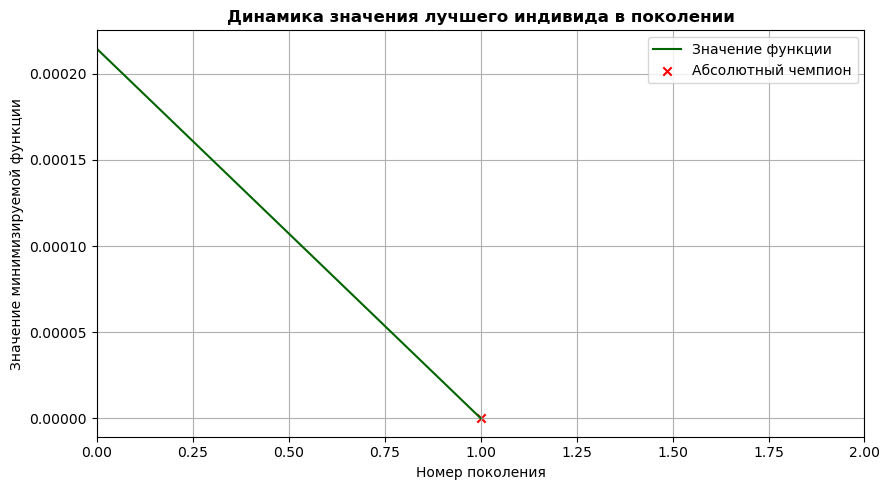

In [95]:
plot(problem_Rast, pop_rast, pop_rast[5])

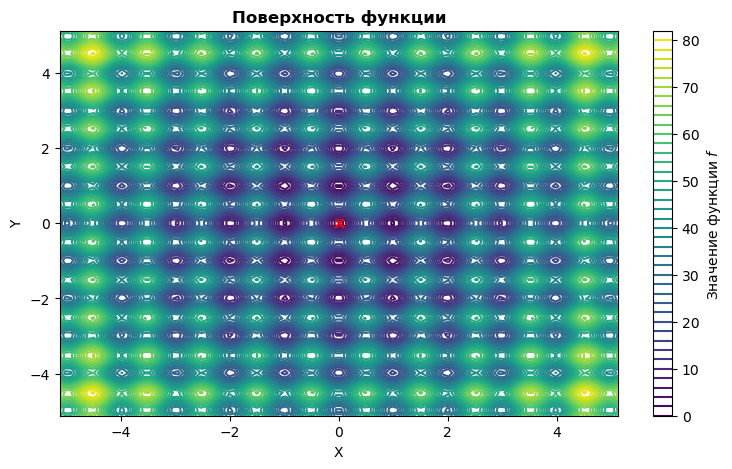

In [96]:
plot_surf(problem_Rast, pop_rast)

### Rosenbrock

In [97]:
pop_rosen = population(problem_Rosen, size=pop_size, seed=current_seed)

pop_rosen = few_evols(gwo, pop_rosen)

In [98]:
print('Found Minimum Coordinates:', np.around(pop_rosen[0].champion_x, 5))

Found Minimum Coordinates: [0.99983 0.99964]


In [99]:
print('Found Minimum Coordinates:', np.around(pop_rosen[0].champion_f, 5))
pop_rosen[0].champion_f

Found Minimum Coordinates: [0.]


array([7.43777597e-08])

In [100]:
pop_rosen[3]

[(1, 1.8328850069659685e-05, 1.8111571407440515e-05, 1.803943383206924e-05),
 (3, 1.8328850069659685e-05, 1.8111571407440515e-05, 1.803943383206924e-05),
 (5, 1.8328850069659685e-05, 1.8111571407440515e-05, 1.803943383206924e-05),
 (7, 1.8328850069659685e-05, 1.8111571407440515e-05, 1.803943383206924e-05),
 (9, 1.8328850069659685e-05, 1.8111571407440515e-05, 1.803943383206924e-05)]

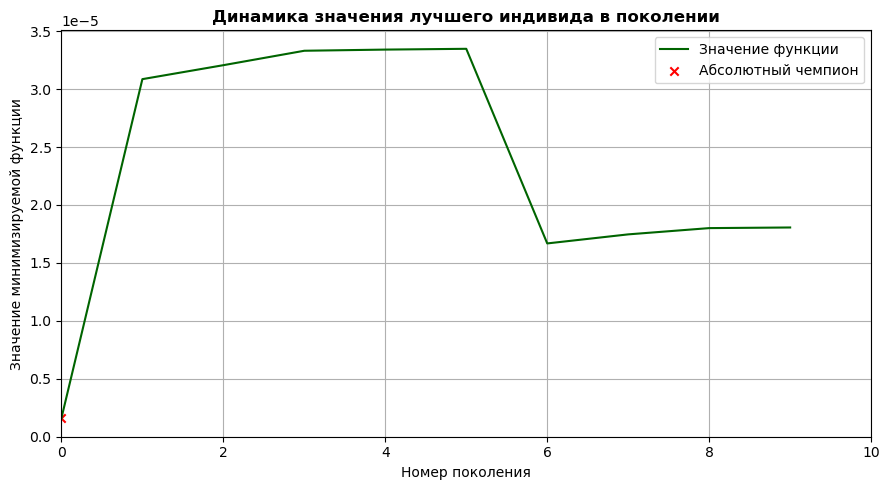

In [101]:
plot(problem_Rosen, pop_rosen, pop_rosen[5])

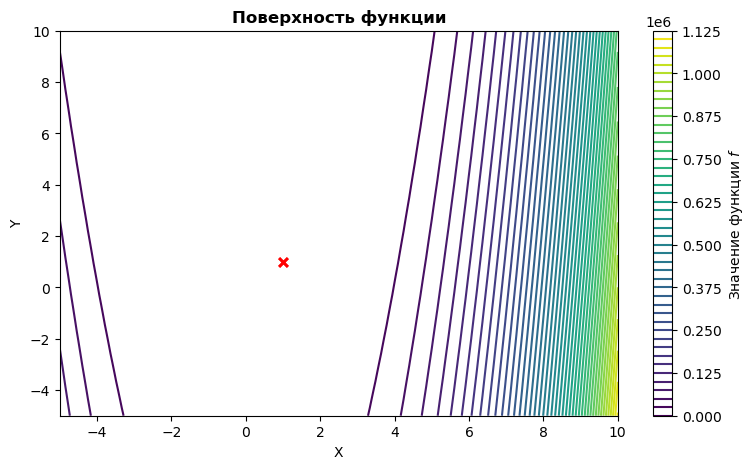

In [102]:
plot_surf(problem_Rosen, pop_rosen)

In [103]:
pop_rosen[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
0,Himmelblau,pygmo.core.sade,100,10,10,"[2.99998, 2.00001]",[0.0]
1,Rastrigin,pygmo.core.sade,100,10,4,"[0.00302, 0.00275]",[0.00331]
2,Rosenbrock,pygmo.core.sade,100,10,10,"[1.00001, 1.00003]",[0.0]
3,Himmelblau,pygmo.core.gwo,100,10,4,"[3.58305, -1.84691]",[0.00011]
4,Rastrigin,pygmo.core.gwo,100,5,2,"[-0.0, 0.0]",[0.0]
5,Rosenbrock,pygmo.core.gwo,100,10,10,"[0.99983, 0.99964]",[0.0]


<a id='gen3'></a>

## Extended Ant Colony Optimization algorithm (gaco)
сделаю третий, так как интересно как работает, почему бы и нет (:

### Himmelblau

In [104]:
pop_him = population(problem_Him, size=pop_size, seed=current_seed)

pop_him = few_evols(gaco, pop_him, 10, 2)

In [105]:
print('Found Minimum Coordinates:', np.around(pop_him[0].champion_x, 5))
pop_him[0].champion_x

Found Minimum Coordinates: [3. 2.]


array([2.99999988, 2.00000004])

In [106]:
print('Found Minimum Coordinates:', np.around(pop_him[0].champion_f, 5))
pop_him[0].champion_f

Found Minimum Coordinates: [0.]


array([4.87947353e-13])

Работает даже луше чем предыдущие

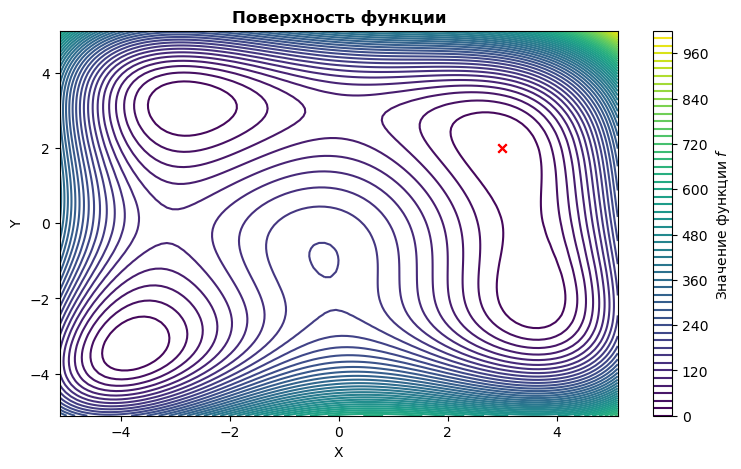

In [108]:
plot_surf(problem_Him, pop_him)

In [107]:
pop_him[3]

[(1,
  1000,
  0.0019287628954659016,
  13,
  0.08827037278246659,
  0.06403696388562352,
  0.051989068863432374),
 (3,
  1200,
  0.00023316126232297217,
  13,
  0.00023316126232297217,
  0.011307513520496748,
  0.0005815967713786205),
 (5,
  1400,
  1.3542413484468594e-06,
  13,
  2.594980824841773e-05,
  0.0037979395017642137,
  8.429163708649536e-05),
 (7,
  1600,
  2.0968215484494328e-08,
  13,
  3.5749978086843404e-07,
  0.00016852515739418372,
  2.1097055407861529e-07),
 (9,
  1800,
  7.384089993808844e-11,
  13,
  1.6068217309250207e-09,
  3.451292598821709e-06,
  5.569359054689037e-10)]

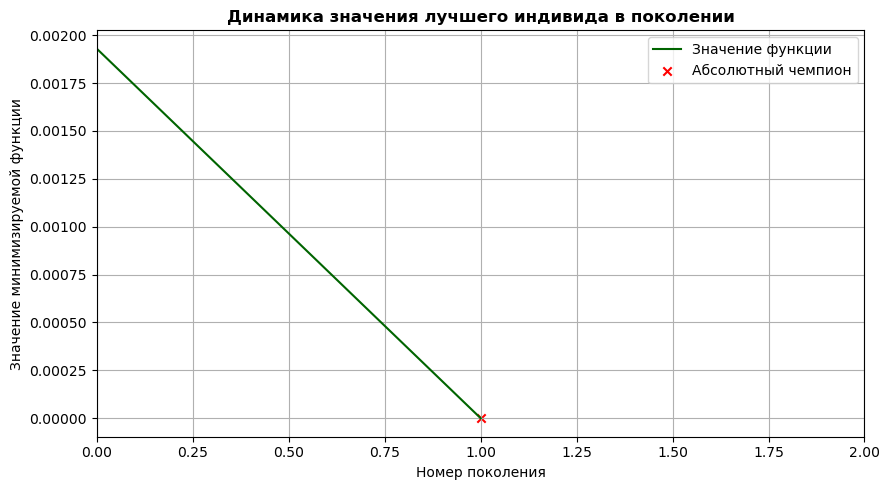

In [110]:
plot(problem_Him, pop_him, pop_him[5])

In [111]:
pop_him[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
0,Himmelblau,pygmo.core.sade,100,10,10,"[2.99998, 2.00001]",[0.0]
1,Rastrigin,pygmo.core.sade,100,10,4,"[0.00302, 0.00275]",[0.00331]
2,Rosenbrock,pygmo.core.sade,100,10,10,"[1.00001, 1.00003]",[0.0]
3,Himmelblau,pygmo.core.gwo,100,10,4,"[3.58305, -1.84691]",[0.00011]
4,Rastrigin,pygmo.core.gwo,100,5,2,"[-0.0, 0.0]",[0.0]
5,Rosenbrock,pygmo.core.gwo,100,10,10,"[0.99983, 0.99964]",[0.0]
6,Himmelblau,pygmo.core.gaco,100,10,2,"[3.0, 2.0]",[0.0]


### Rastrigin

In [112]:
pop_rast = population(problem_Rast, size=pop_size, seed=current_seed)

pop_rast = few_evols(gaco, pop_rast, 10, 2)

In [113]:
print('Found Minimum Coordinates:', np.around(pop_rast[0].champion_x, 5))
pop_rast[0].champion_x

Found Minimum Coordinates: [-4.e-05  1.e-05]


array([-4.29992356e-05,  9.65085977e-06])

In [114]:
print('Found Minimum Coordinates:', np.around(pop_rast[0].champion_f, 5))
pop_rast[0].champion_f

Found Minimum Coordinates: [0.]


array([3.85291987e-07])

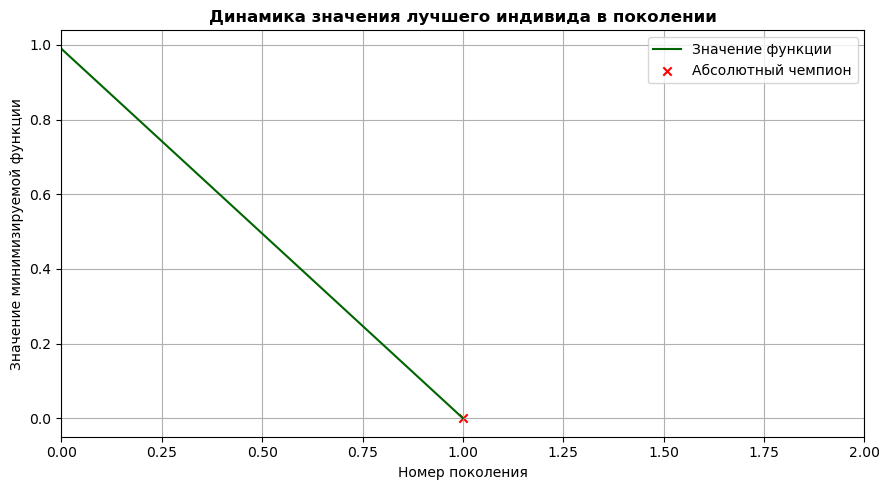

In [115]:
plot(problem_Rast, pop_rast, pop_rast[5])

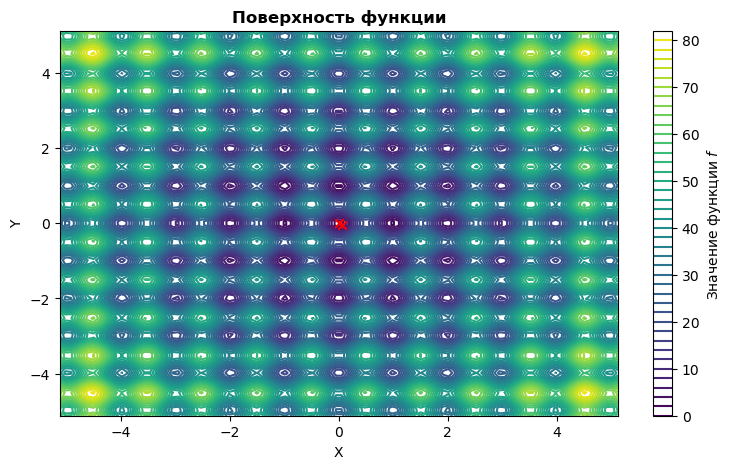

In [116]:
plot_surf(problem_Rast, pop_rast)

### Rosenbrock

In [117]:
pop_rosen = population(problem_Rosen, size=pop_size, seed=current_seed)

pop_rosen = few_evols(gaco, pop_rosen, 10, 2)

In [118]:
print('Found Minimum Coordinates:', np.around(pop_rosen[0].champion_x, 5))

Found Minimum Coordinates: [0.99952 0.99903]


In [119]:
print('Found Minimum Coordinates:', np.around(pop_rosen[0].champion_f, 5))
pop_rosen[0].champion_f

Found Minimum Coordinates: [0.]


array([2.70071599e-07])

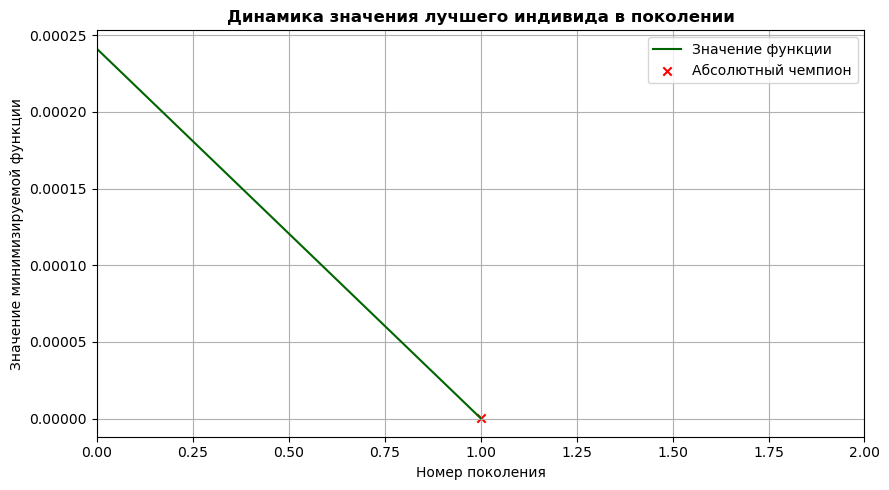

In [120]:
plot(problem_Rosen, pop_rosen, pop_rosen[5])

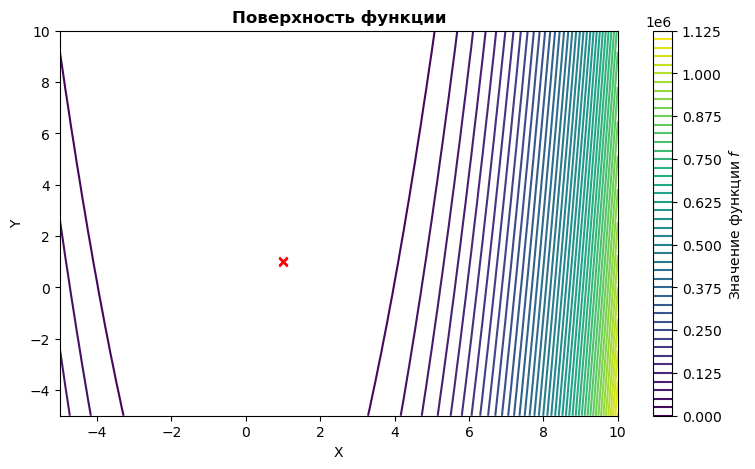

In [121]:
plot_surf(problem_Rosen, pop_rosen)

In [122]:
# выведем таблицу со всеми проделанными тестами и их характиристиками
pop_rosen[4]

,Problem,Method,Pop_Size,Num_Geners,Num_Evoluts,Min_Coordinates,Function_Value
0,Himmelblau,pygmo.core.sade,100,10,10,"[2.99998, 2.00001]",[0.0]
1,Rastrigin,pygmo.core.sade,100,10,4,"[0.00302, 0.00275]",[0.00331]
2,Rosenbrock,pygmo.core.sade,100,10,10,"[1.00001, 1.00003]",[0.0]
3,Himmelblau,pygmo.core.gwo,100,10,4,"[3.58305, -1.84691]",[0.00011]
4,Rastrigin,pygmo.core.gwo,100,5,2,"[-0.0, 0.0]",[0.0]
5,Rosenbrock,pygmo.core.gwo,100,10,10,"[0.99983, 0.99964]",[0.0]
6,Himmelblau,pygmo.core.gaco,100,10,2,"[3.0, 2.0]",[0.0]
7,Rastrigin,pygmo.core.gaco,100,10,2,"[-4e-05, 1e-05]",[0.0]
8,Rosenbrock,pygmo.core.gaco,100,10,2,"[0.99952, 0.99903]",[0.0]


Как вывод можно сказать, что все методы (генетические алгоритмы) работают очень быстро с крайне высокой точностью! Всем тред алгоритмам удалось найти минимум с точностью до сотых и больше даже у самых сложных тестовых функций Растигина и Розенброка.

<a id='gen4m'></a>

## Special Task - Own Defined Optimization Problem